# Objective: 
- NPS - EDA in R
- Analyze Customer data components
- Sentiment Analysis
- Modeling approaches
- Recommendations


- What is net promorter score (NPS)?
Net Promoter Score or NPS is a customer loyalty metric and was developed by Fred Reichheld and it asks respondents to answer a single question. 

> How likely are you to recommend this product? The respondents are asked to score between 0 and 10. 10 being “most likely” to recommend and 0 being “least likely”.

> An additional optional question is asked about why they picked this score and the response to that is usually a text comment. We will make an attempt to summarize the text as well.

-  I have Amazon Product Reviews as a exploratory dataset, available through https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products. This is a list of over 34,000 consumer reviews for Amazon products like the Kindle, Fire TV Stick, and more provided by DataInfiniti's Product database.

First, let’s load up some packages.

In [1]:
#install.packages('NPS')
library(NPS)
library(ggplot2)
library(lubridate)
library(dplyr)
library(tidyr)
library(RColorBrewer)
#install.packages('ggridges')
library(ggridges)
library(reshape2)
#install.packages('tidytext')
library(tidytext)
#install.packages('wordcloud')
library(wordcloud)
#install.packages('tm')
library(tm)
library(stringr)
library(SnowballC)
theme_set(theme_minimal())

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'dplyr'

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'ggridges'

The following object is masked from 'package:ggplot2':

    scale_discrete_manual


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Loading required package: NLP

Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate



# Analyze the data.
- Next load up the data and take a look.

In [2]:
# get data
d1<-read.csv('1429_1.csv', header = TRUE, quote = '"'
                , na.strings=c("", "NA", "#N/A"))
d2<-read.csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', header = TRUE, quote = '"'
                , na.strings=c("", "NA", "#N/A"))

In [3]:
# head of the data
t(head(d1,1))

,1
id,AVqkIhwDv8e3D1O-lebb
name,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta"
asins,B01AHB9CN2
brand,Amazon
categories,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets"
keys,"841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2"
manufacturer,Amazon
reviews.date,2017-01-13T00:00:00.000Z
reviews.dateAdded,2017-07-03T23:33:15Z
reviews.dateSeen,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z"


In [4]:
t(head(d2,1))

,1
ï..id,AVpgNzjwLJeJML43Kpxn
dateAdded,2015-10-30T08:59:32Z
dateUpdated,2019-04-25T09:08:16Z
name,AmazonBasics AAA Performance Alkaline Batteries (36 Count)
asins,"B00QWO9P0O,B00LH3DMUO"
brand,Amazonbasics
categories,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care"
primaryCategories,Health & Beauty
imageURLs,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7UlL._SS40_.jpg,https://www.upccodesearch.com/images/barcode/0841710106442.png,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51DfBuqy4qL._SL1189_.jpg,https://images-na.ssl-images-amazon.com/images/I/51TshsEJTIL.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%25252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51g3uIwzOIL._SL1050_.jpg,http://ecx.images-amazon.com/images/I/613LUdOc1eL._SS40_.jpg"
keys,"amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o"


In [5]:
# columns
names(d1)
names(d2) # Basically both the datasets are the same, so let's just work with this one!

[1] "id"                   "name"                 "asins"               
 [4] "brand"                "categories"           "keys"                
 [7] "manufacturer"         "reviews.date"         "reviews.dateAdded"   
[10] "reviews.dateSeen"     "reviews.didPurchase"  "reviews.doRecommend" 
[13] "reviews.id"           "reviews.numHelpful"   "reviews.rating"      
[16] "reviews.sourceURLs"   "reviews.text"         "reviews.title"       
[19] "reviews.userCity"     "reviews.userProvince" "reviews.username"

[1] "ï..id"               "dateAdded"           "dateUpdated"        
 [4] "name"                "asins"               "brand"              
 [7] "categories"          "primaryCategories"   "imageURLs"          
[10] "keys"                "manufacturer"        "manufacturerNumber" 
[13] "reviews.date"        "reviews.dateSeen"    "reviews.didPurchase"
[16] "reviews.doRecommend" "reviews.id"          "reviews.numHelpful" 
[19] "reviews.rating"      "reviews.sourceURLs"  "reviews.text"       
[22] "reviews.title"       "reviews.username"    "sourceURLs"

In [6]:
# descriptive stats
summary(d2)

                  ï..id                     dateAdded   
 AVpgNzjwLJeJML43Kpxn:8343   2015-10-30T08:59:32Z:8343  
 AVpe7xlELJeJML43ypLz:3728   2015-12-03T01:23:41Z:3728  
 AVqkIhxunnc1JgDc3kg_:2443   2017-03-03T16:55:53Z:3582  
 AVqVGWQDv8e3D1O-ldFr:2370   2017-01-11T06:58:33Z:3101  
 AVpfw2hvilAPnD_xh0rH:1676   2017-03-06T14:59:43Z:2443  
 AVph0EeEilAPnD_x9myq:1425   2016-04-10T22:00:34Z:1024  
 (Other)             :8347   (Other)             :6111  
               dateUpdated  
 2019-04-25T09:08:16Z:8343  
 2019-03-09T07:13:43Z:4301  
 2019-04-24T02:17:42Z:3728  
 2019-02-23T02:49:38Z:2443  
 2019-02-25T02:23:15Z:1569  
 2019-02-25T02:03:34Z:1499  
 (Other)             :6449  
                                                                                    name     
 AmazonBasics AAA Performance Alkaline Batteries (36 Count)                           :8343  
 AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary       :3728  
 Fire HD 8 Tablet with Alexa, 

In [7]:
write.csv(t(summary(d2)),'SummaryStats.csv') # just for a quick look into it, we save it to .csv format

In [8]:
nps <- d2 %>% drop_na(reviews.rating)

In [9]:
nrow(nps)

[1] 28332

In [10]:
nps$dateAdded <- as.Date.factor(nps$dateAdded)

In [11]:
nps$dateUpdated <- as.Date.factor(nps$dateUpdated)

In [12]:
# Date variables - to enrich the data
nps$year <- as.factor(year(nps$dateAdded))
nps$month <- cut(nps$dateAdded, breaks = "month")
nps$days <- nps$dateAdded - nps$dateUpdated
nps$weekday <- weekdays(nps$dateAdded)
nps$weekday <- factor(nps$weekday, levels = c("Sunday", "Monday", "Tuesday", 
    "Wednesday", "Thursday", "Friday", "Saturday"))


In [13]:
nps$reviews.rating <- nps$reviews.rating*2  
summary(nps$reviews.rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   8.000  10.000   9.028  10.000  10.000 

In [14]:
# Introducing Categories - Detractor", "Passive", "Promoter
nps$cat <- cut(nps$reviews.rating, breaks = c(-1, 6, 8, 10), labels = c("Detractor", 
    "Passive", "Promoter"))

In [15]:
nps$cat 

[1] Detractor Passive   Promoter  Promoter  Promoter  Promoter  Promoter 
    [8] Promoter  Detractor Passive   Promoter  Detractor Promoter  Promoter 
   [15] Promoter  Promoter  Detractor Detractor Passive   Detractor Passive  
   [22] Promoter  Promoter  Passive   Detractor Passive   Passive   Promoter 
   [29] Promoter  Detractor Passive   Promoter  Promoter  Promoter  Passive  
   [36] Promoter  Promoter  Detractor Promoter  Detractor Promoter  Promoter 
   [43] Detractor Detractor Promoter  Detractor Promoter  Detractor Passive  
   [50] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
   [57] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
   [64] Passive   Detractor Passive   Detractor Promoter  Promoter  Promoter 
   [71] Promoter  Promoter  Promoter  Promoter  Detractor Promoter  Promoter 
   [78] Passive   Promoter  Promoter  Passive   Passive   Promoter  Promoter 
   [85] Passive   Promoter  Promoter  Promoter  Promoter  Promoter  Passive  
   [92] Passive   Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
   [99] Promoter  Promoter  Promoter  Passive   Detractor Promoter  Promoter 
  [106] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
  [113] Promoter  Promoter  Detractor Detractor Promoter  Promoter  Promoter 
  [120] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
  [127] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
  [134] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
  [141] Promoter  Promoter  Promoter  Promoter  Promoter  Passive   Promoter 
  [148] Promoter  Promoter  Promoter  Promoter  Passive   Promoter  Promoter 
  [155] Promoter  Promoter  Promoter  Promoter  Promoter  Passive   Promoter 
  [162] Promoter  Promoter  Promoter  Passive   Promoter  Passive   Promoter 
  [169] Promoter  Promoter  Passive   Promoter  Promoter  Passive   Promoter 
  [176] Detractor Promoter  Promoter  Promoter  Promoter  Detractor Promoter 
  [183] Promoter  Detractor Passive   Promoter  Passive   Detractor Detractor
  [190] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
  [197] Promoter  Promoter  Detractor Promoter  Promoter  Promoter  Promoter 
  [204] Detractor Detractor Promoter  Detractor Passive   Detractor Promoter 
  [211] Passive   Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
  [218] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
  [225] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
  [232] Promoter  Promoter  Promoter  Passive   Promoter  Promoter  Promoter 
  [239] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
  [246] Promoter  Promoter  Promoter  Promoter  Passive   Promoter  Promoter 
  [253] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
  [260] Passive   Promoter  Promoter  Detractor Promoter  Promoter  Passive  
  [267] Promoter  Passive   Passive   Promoter  Promoter  Promoter  Detractor
  [274] Detractor Promoter  Promoter  Promoter  Passive   Promoter  Promoter 
  [281] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Detractor
  [288] Detractor Promoter  Promoter  Promoter  Promoter  Passive   Passive  
  [295] Promoter  Promoter  Passive   Promoter  Promoter  Promoter  Promoter 
  [302] Promoter  Promoter  Promoter  Detractor Promoter  Promoter  Promoter 
  [309] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
  [316] Promoter  Promoter  Passive   Promoter  Promoter  Promoter  Promoter 
  [323] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
  [330] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
  [337] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
  [344] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Detractor
  [351] Promoter  Promoter  Promoter  Promoter  Promoter  Promoter  Promoter 
  [358] Promoter  Promoter

# Overall NPS Score
- What’s the overall NPS score?

In [16]:
nps(nps$reviews.rating,  breaks = list(0:6, 7:8, 9:10))

[1] 0.6039108

# Yearly changes
- Has there been any change in the score over time?

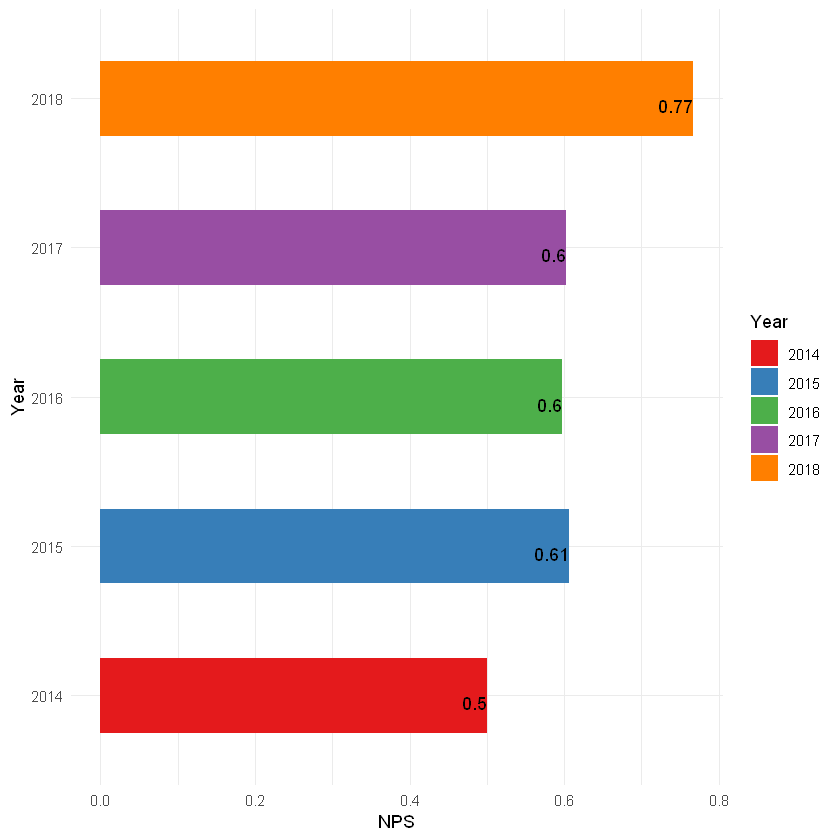

In [17]:
yearly <- aggregate(nps$reviews.rating, list(nps$year), FUN = nps, nps$reviews.rating)

ggplot(yearly) + 
  geom_col(aes(x=as.factor(Group.1), y=x, fill=as.factor(Group.1)), width=0.5) +
  xlab("Year") + 
  ylab("NPS") + 
  geom_text(aes(x=as.factor(Group.1), y=x, label=round(x,2)),  vjust = 1, hjust = 1)  +
  coord_flip()  + 
  scale_fill_brewer("Year", palette = "Set1")

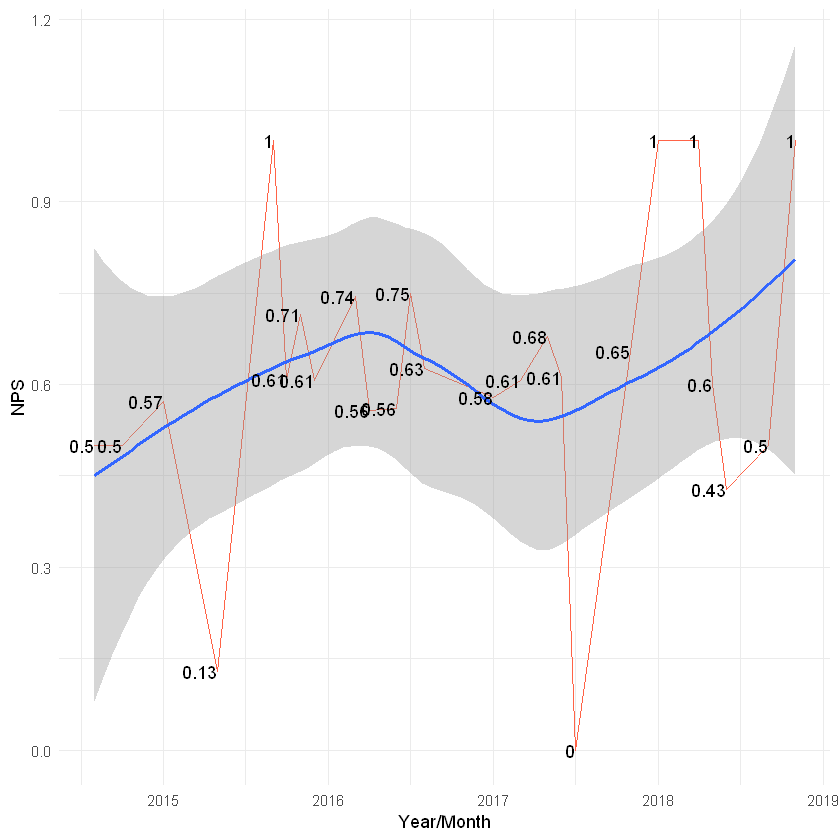

In [18]:
# Monthly changes
np <- aggregate(nps$reviews.rating, list(nps$month), FUN = nps, nps$reviews.rating)

ggplot(np, aes(x=as.Date( Group.1), y=x)) + 
  geom_line(color = "tomato") + 
  geom_smooth(method = "loess") + 
  xlab("Year/Month") + 
  ylab("NPS") + 
  geom_text(aes( y=x, label=round(x,2)), position = position_dodge(width = 1), vjust = 0.5, hjust=1)  + 
  theme_minimal() 

# Exploring some other dimensions
- Are there other dimensions that affect NPS?

> Day of the week

- Does the day of the week affect the score?
- Looks like responses provided on Saturday have a higher score!
On average the freq is the same though

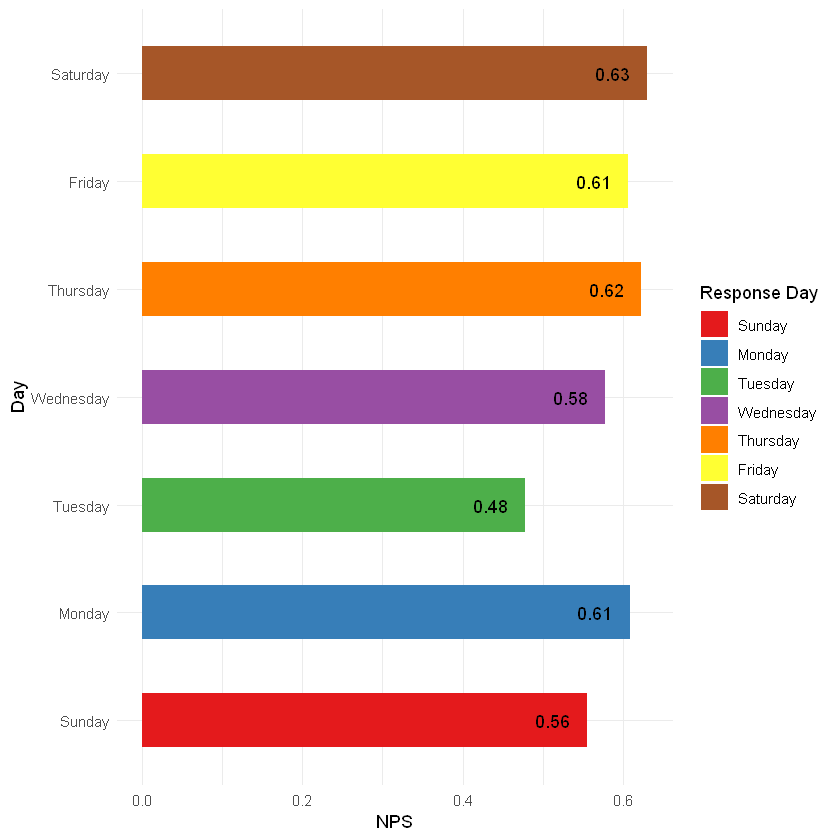

In [19]:
daily <- aggregate(nps$reviews.rating, list(nps$weekday), FUN = nps, nps$reviews.rating)

daily$Group.1 <- factor(daily$Group.1, levels = c("Sunday", "Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

ggplot(daily) + 
  geom_col(aes(x=as.factor(Group.1), y=x, fill=as.factor(Group.1)), width=0.5) +
  xlab("Day") + 
  ylab("NPS") + 
  geom_text(aes(x=as.factor(Group.1), y=x, label=round(x,2)),  vjust = 0.5, hjust = 1.5)  + 
  coord_flip()  + 
  scale_fill_brewer("Response Day", palette = "Set1")

> Day of Week vs ratings

- kernel density of the scores (0-10) received by day.It seems that respondents who leave scores on Friday seem to provide more 10s compared to Saturday. Infact, it seems like 

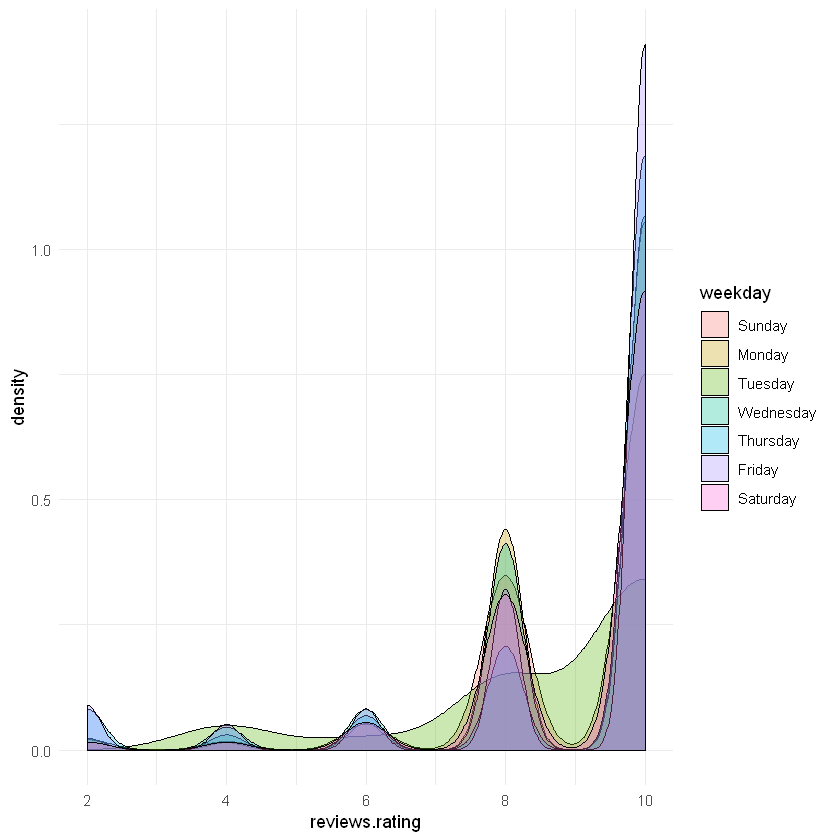

In [20]:
ggplot(nps) + 
  geom_density(aes( x = reviews.rating,  group = weekday, fill = weekday), alpha = 0.3)

Here is a ridges plot for the score density by day. It’s harder to compare the relative heights of the score density compared to the density plot above. The bi-modal distribution of scores on Sunday is, however, quite clear here.

Picking joint bandwidth of 0.33


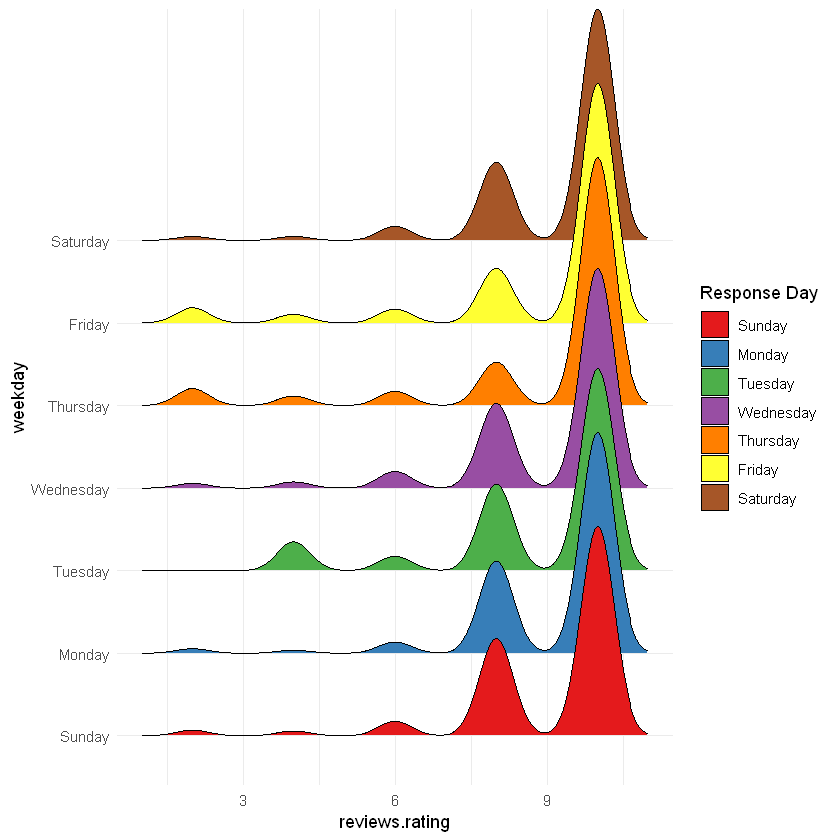

In [21]:
ggplot(nps) + 
  geom_density_ridges(aes( x = reviews.rating, y = weekday, fill = weekday), scale = 3) +
  scale_fill_brewer("Response Day", palette = "Set1")
## Picking joint bandwidth of 0.724

> Scores over the years
- How have the scores changed over time?
- Has the median score shifted over the years?

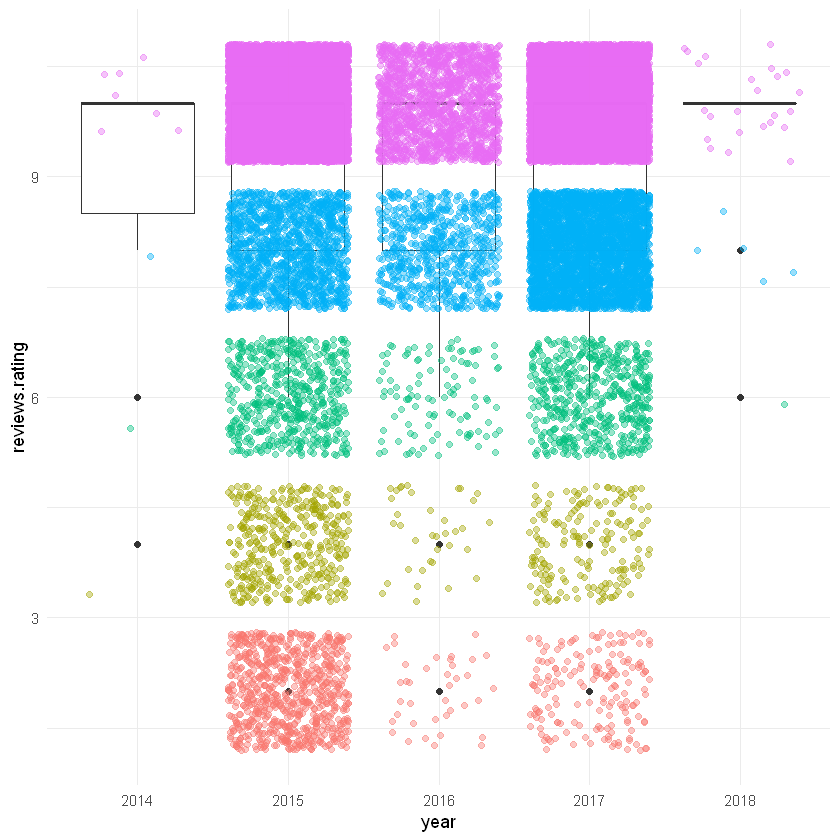

In [22]:
ggplot(subset(nps, !is.na(year)), aes(y=reviews.rating, x=year)) + 
  geom_boxplot() + 
  geom_point( position = "jitter", alpha = 0.4, aes(color=as.factor(reviews.rating))) + 
  guides(color=FALSE) 

To see a percentage distribution, we can plot the cumulative frequency distribution of the Score categories grouped by year. The plot shows what percentage of Scores fall into which category groups.

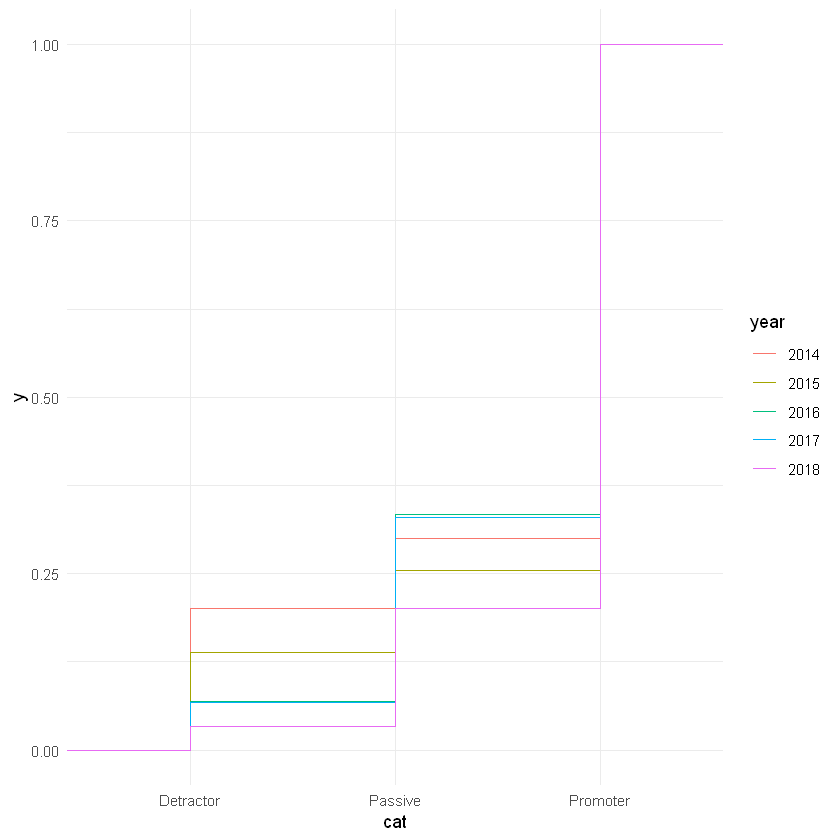

In [23]:
ggplot(nps) + 
  stat_ecdf(aes(x=cat, group = year, colour = year))

The table below shows the exact percentage of category groups by year. One can see that while the percentage of detractors has remained somewhat static over the years, some of the passive group has shifted to being promorters.

In [24]:
nps %>% 
  group_by(year, cat) %>% 
  summarise(cat_count = length(cat)) %>% mutate(pct = round((cat_count/sum(cat_count)*100),2))

year,cat,cat_count,pct
2014,Detractor,2,20.00
2014,Passive,1,10.00
2014,Promoter,7,70.00
2015,Detractor,1702,13.89
2015,Passive,1419,11.58
2015,Promoter,9132,74.53
2016,Detractor,180,6.86
2016,Passive,696,26.51
2016,Promoter,1749,66.63
2017,Detractor,902,6.72


In [25]:
# Group by Manufacturer and Product Categories and many more
manu_score <- nps  %>% 
  group_by(manufacturer) %>% 
  summarise(nps = nps(reviews.rating))
## Warning: Factor `Vertical` contains implicit NA, consider using
## `forcats::fct_explicit_na`



In [26]:
nps$category <- substr(nps$categories,1, 20)


In [27]:
cat_score <- nps  %>% 
  group_by(category) %>% 
  summarise(nps = nps(reviews.rating))

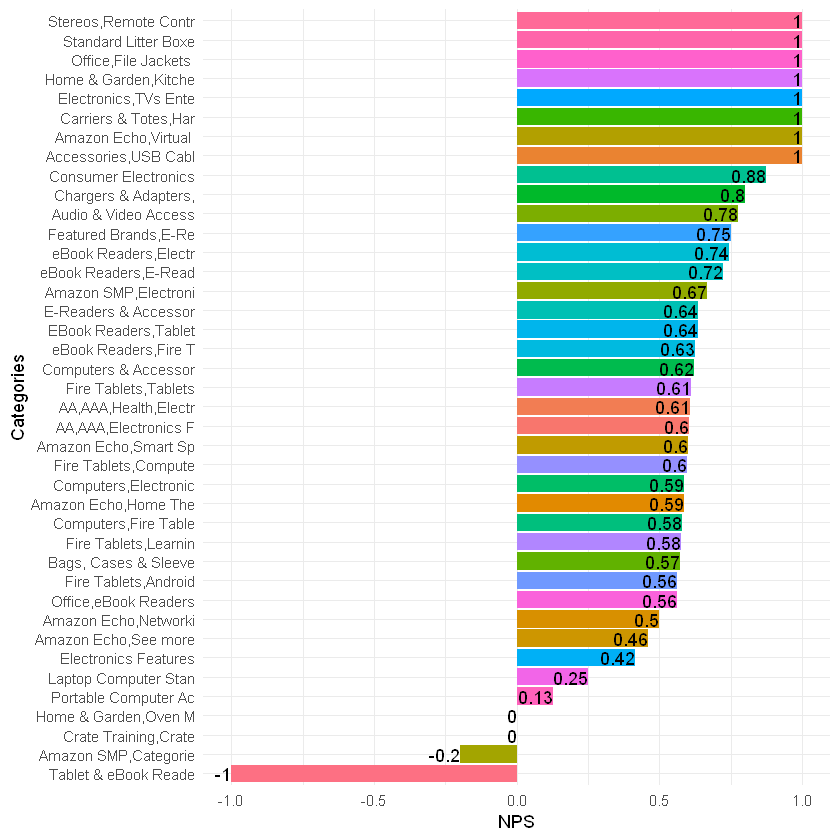

In [28]:
ggplot(cat_score) + 
  geom_col(aes(x=reorder(category, nps), y=nps, fill=category)) + 
  guides(fill=FALSE) +
  coord_flip() +
  scale_fill_discrete(name = "Categories") +
  ylab("NPS") + xlab("Categories") +
  geom_text(aes(x=category, y=nps, label=round(nps,2)), position = position_dodge(width = 1),vjust = 0.5, hjust=1)

> As evident from this that there are several dimensions to guide us about the respondents and what they like about the platform. The next steps here would be to try and perform classification and machine learning techniques to examine this data further.

- Before we get into ML, let’s perform some more exploration on the text included in the data.

# Text Analysis

- This part will try to analyze the sentiment of the **comments** to perhaps try and understand what the detractors don’t like and what the promoters like. To do this we will try and perform the following tasks.

## Introduction
- Tokenize the text comments. We will explore both with word and sentence level tokens.Perform sentiment analysis using three different sentiment lexicons. These are pre-scored dictionaries that have sentiment scores already assigned at word levels.
- Look at term document frequencies
- Try and explore n-grams to see relationship between words.
- Finally, try out the word2vec neural network to explore the corpus.

## Tokenization
- We will keep the categories in place to see how the sentiment correlates to the scores. Let’s see how many comments we have from each category.

In [29]:
comments <- nps %>% 
  filter(!is.na(reviews.text)) %>% 
  select(cat, reviews.text) %>% 
  group_by(row_number(), cat) 


In [30]:
comments <- comments %>% ungroup()

In [31]:
comments$reviews.text <- as.character(comments$reviews.text)

- Next we will use unnest_tokens from the tidytext package to tokenize the words while retaining the corresponding categories.

In [32]:
nps_words <- comments %>% unnest_tokens(word, reviews.text)

In [33]:
nps_words[1:10,]

cat,row_number(),word
Detractor,1,i
Detractor,1,order
Detractor,1,3
Detractor,1,of
Detractor,1,them
Detractor,1,and
Detractor,1,one
Detractor,1,of
Detractor,1,the
Detractor,1,item


> Our next step is to remove some common words that are not useful for analysis. These include pronouns, articles and other common words. The tidytext package already includes a wide range of these in the stop_words dataset.

In [34]:
nps_words <-  nps_words %>% anti_join(stop_words, by = c('word'))
nps_words %>% count(word, sort = TRUE)

word,n
batteries,8097
tablet,6637
price,5195
amazon,3750
love,3537
bought,3179
easy,2938
kindle,2869
kids,2504
buy,2263


In [35]:
nps_words

cat,row_number(),word
Detractor,1,3
Detractor,1,item
Detractor,1,bad
Detractor,1,quality
Detractor,1,missing
Detractor,1,backup
Detractor,1,spring
Detractor,1,pcs
Detractor,1,aluminum
Detractor,1,battery


>Sentiment Analysis

-We will be using three different sentiment dictionaries to test out the sentiments for each comment.

The plot below shows the sentiments grouped by the category using the Bing dictionary. The **Afinn dictionary** assigns a category from negative to positive with negative words and  positive. It’s clear that the detractor comments are less positive than the promoters.

In [36]:
install.packages('textdata')
library(textdata)
library(tidytext)

get_sentiments("bing")


Installing package into 'C:/Users/Prateek/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'textdata' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Prateek\AppData\Local\Temp\RtmpUlqQcn\downloaded_packages


word,sentiment
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative
aborts,negative


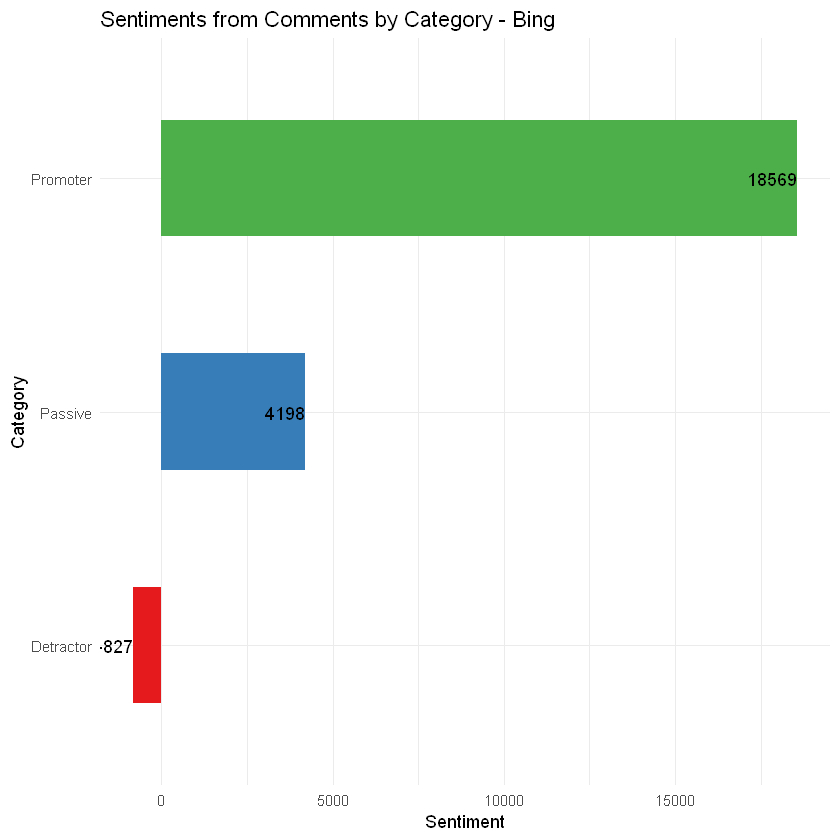

In [37]:
nps_words %>% 
  inner_join(get_sentiments("bing"), by = c('word')) %>%
  count(cat, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative) %>%
ggplot(aes(x=cat, y = sentiment, fill = cat)) + 
  geom_col(width = 0.5) +
  coord_flip() +
  geom_text(aes(x=cat, y=sentiment, label=sentiment), position = position_dodge(width = 1), hjust=1) +  
  scale_fill_brewer(palette = "Set1") +
  guides(fill=FALSE) +
  labs(title = "Sentiments from Comments by Category - Bing", x = "Category", y = "Sentiment")

Selecting by n


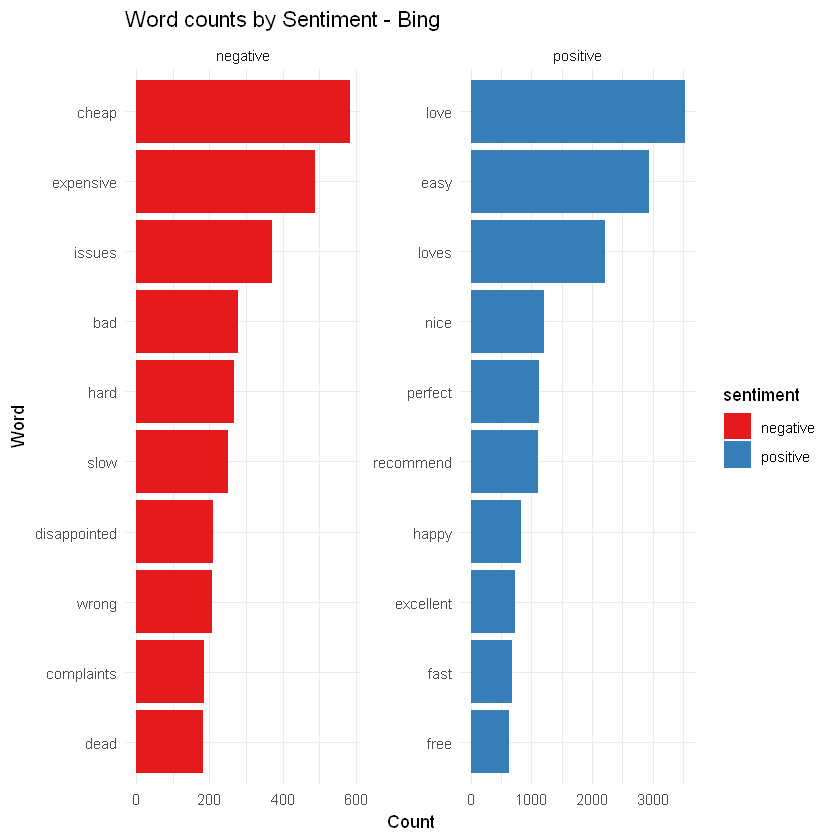

In [38]:
nps_words %>% 
  inner_join(get_sentiments("bing"), by = c('word')) %>%
  count(word, sentiment) %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  ggplot(aes(x=reorder(word, n), y = n, fill = sentiment)) +
  geom_col() +
  facet_wrap( ~ sentiment, scales = "free") + coord_flip() +
  scale_fill_brewer(palette = "Set1") +
  labs(title = "Word counts by Sentiment - Bing", x = "Word", y = "Count")
## Selecting by n

# Modeling and Prediction

> Business Problem
- The business problem is predicting Net promoter score(NPS) to improve Customer experience at Amazon and thereby identifying those factors which significantly influence NPS score.

> Analytical Problem
- To convert this business problem into an analytical one, customer feedback is to be integrated with NPS to understand customer willingness to recommend Amazon to others. An analytical model is to be built using NPS as an effective tool to understand customer concerns and identifying factors significantly influencing NPS.

> stats modeling
- NPS-multinomial.
- NPS-multinomial-groups.stan: Same as above, but estimates proportions conditional on some group membership predictor
- NPS-cumulative.stan: Stan code modeling responses using an ordered/cumulative logit model. Better assumption-wise and less of a hassle to incorporate non-categorical predictor variables. Throws some (usually harmless) warnings about rejected metropolis proposals.
- NPS-models.R: R code for running models. Will require some editing to use.

>Implementation
- Split training and test data
- Check multicollinearity and calculate Variance Inflation factor
- Feature selection based on p-values of significance
- Build Logistic Regression Model
- identify the factors influencing NPS
- Check the accuracy on test data

In [39]:
library(rstan)
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())



Loading required package: StanHeaders
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For improved execution time, we recommend calling
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
although this causes Stan to throw an error on a few processors.

Attaching package: 'rstan'

The following object is masked from 'package:tidyr':

    extract



In [40]:
scores <-nps %>% select(cat, reviews.rating)



In [41]:
scores

cat,reviews.rating
Detractor,6
Passive,8
Promoter,10
Promoter,10
Promoter,10
Promoter,10
Promoter,10
Promoter,10
Detractor,6
Passive,8


In [42]:
# First, get a quick estimate from the actual observations:
#scores$binned <- "detractor"
#scores$binned[scores$response%in%c(7,8)] <- "passive"
#scores$binned[scores$response%in%c(9,10)] <- "promoter"
#scores$binned <- as.factor(scores$binned)
pPro <- sum(scores$cat=="Promoter")/length(scores$cat)
pDet <- sum(scores$cat=="Detractor")/length(scores$cat)
pPas <- sum(scores$cat=="Passive")/length(scores$cat)
(npsAll <- pPro  - pDet)



[1] 0.6039108

In [43]:

# Stan takes data as lists. This list has just responses, no grouping variable.
# The alpha value here is equivalent to adding one observation to each cell.

scoresListNoGroups <- list(N = length(scores$reviews.rating),
                           K = 11,
                           y=scores$reviews.rating+1, # assuming a 0-10 scale here. Drop +1 if scale starts at 1.
                           alpha = rep(2,11)) # For no smoothing, use alpha = rep(1,11)

# version with grouping variable, assuming group is a factor:
#scoresListGrouped <- list(N = length(scores$reviews.rating), K = 11,y=scores$reviews.rating+1, alpha = rep(2,11),
                 # g = as.numeric(scores$groupVar), G=length(levels(scores$groupVar)))


# Compile models:
stanModMultinomial <- stan_model(file = "NPS-multinomial.stan", model_name = "multinomial")
#stanModMultinomialGrouped <- stan_model(file = "NPS-multinomial-grouped.stan", model_name = "multinomial")
#stanModOrdered <- stan_model(file = "NPS-cumulative.stan", model_name = "ordered")



Warning message in readLines(file, warn = TRUE):
"incomplete final line found on 'C:\Users\Prateek\SentimentAnalysis-EDA-NPS\NPS-multinomial.stan'"recompiling to avoid crashing R session


In [44]:
stanModOrdered <- stan_model(file = "NPS-cumulative.stan", model_name = "ordered")


Warning message in readLines(file, warn = TRUE):
"incomplete final line found on 'C:\Users\Prateek\SentimentAnalysis-EDA-NPS\NPS-cumulative.stan'"recompiling to avoid crashing R session


In [45]:
#Fit models:

npsMultinomial <- sampling(stanModMultinomial,data = scoresListNoGroups,chains=4,iter=4000)
# Warnings on this one are *usually* harmless, but best to check convergence diagnostics here.

In [ ]:
#scoresListNoGroups
npsOrdered <- sampling(stanModOrdered,data = scoresListNoGroups,chains=1,iter=200)

In [ ]:
# Compare results:
round(summary(npsMultinomial,pars="score")$summary*100,2)[,c("mean","2.5%","97.5%")]

In [ ]:
round(summary(npsOrdered,pars="score")$summary*100,2)[,c("mean","2.5%","97.5%")]

# and compare to a convenient analytic approximation (see http://stats.stackexchange.com/questions/18603):
npsSD <- sqrt(pPro*(1-npsAll)^2 + pPas*(0-npsAll)^2 + pDet*(-1-npsAll)^2)
npsSE <- npsSD/sqrt(length(scores$cat))
round(c(100*(npsAll-npsSE),100*(npsAll+npsSE)),2)